<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/MultiOscillator_StandingAndTravelingWaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Even Number of Phase-Shifted Oscillator</h1></b>

Dr. Bingsen Wang

11/10/2024
</center>

#Python Code


0
0
50
100
150
200
250
300
350
400
450
0


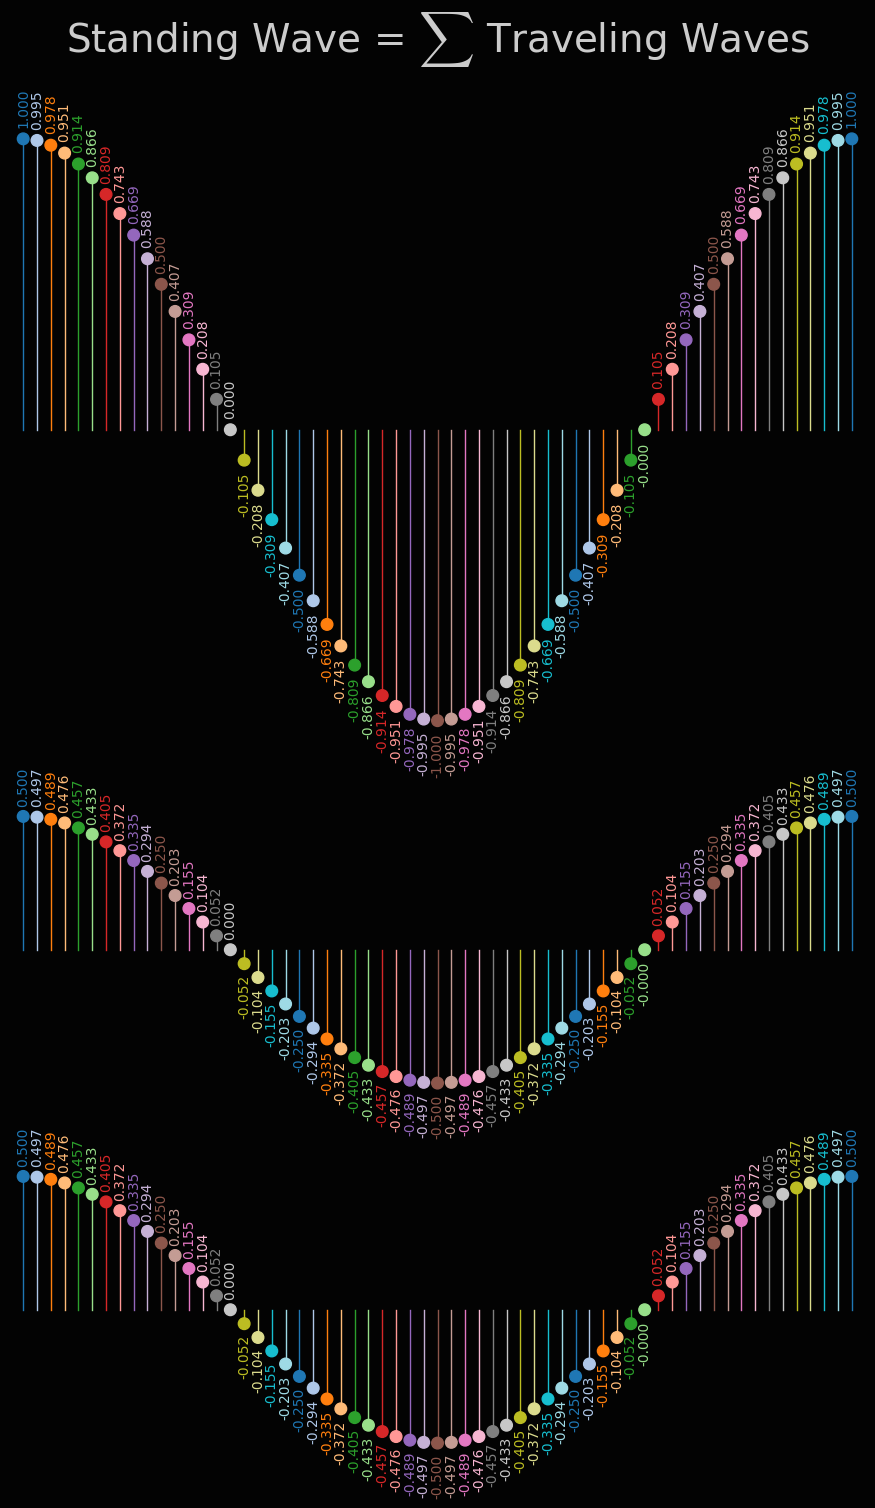

In [137]:
import numpy as np
from matplotlib import animation,pyplot,cm
pyplot.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})

Nf=61
theta,t = np.linspace(0,2*np.pi,Nf),np.linspace(0,1,500)
clst = list(cm.tab20.colors) #colors of lines
fig = pyplot.figure(figsize=([9,16]),facecolor='.01')
ax0 = fig.add_axes((.025,.5,.95,.4),xlim=[min(theta)-.1,max(theta)+.1], ylim=[-1.1,1.1],fc='none')
ax1 = fig.add_axes((.025,.275,.95,.2),xlim=[min(theta)-.1,max(theta)+.1], ylim=[-.6,.6],fc='none')
ax2 = fig.add_axes((.025,.05,.95,.2),xlim=[min(theta)-.1,max(theta)+.1], ylim=[-.6,.6],fc='none')
ax0.text(np.pi,1.3,r'Standing Wave = $\sum$ Traveling Waves',ha='center',size=28,c='.8')
lines,dots,texts = [],[],[]
for ax in [ax0,ax1,ax2]:
  ax.axis('off')
  lines.append([ax.plot([],[],'-',lw=1,color=clst[i%len(clst)])[0] for i in range(Nf)])
  texts.append([ax.text(0,0,'',c=clst[i%len(clst)],ha='center',size=10) for i in range(Nf)])
  dots.append( ax.scatter(theta,theta*0,marker='o',s=70,c=clst*(Nf//len(clst))+clst[:Nf%len(clst)]))
def animate(i):
  if i%50==0: print(i) #for monitoring
  y0=np.cos(theta)*np.cos(2*np.pi*t[i])
  y1=np.cos(theta-2*np.pi*t[i])/2 #traveling to the right
  y2=np.cos(theta+2*np.pi*t[i])/2 #traveling to the left
  y=[y0,y1,y2]
  for k in range(3):
    y_sign=(np.sign(y[k])+1)/2
    [texts[k][j].set_position([theta[j],y[k][j]+.08*(y_sign[j]-.5)]) for j in range(Nf)]
    [texts[k][j].set_text(f'{y[k][j]:.3f}') for j in range(Nf)]
    [texts[k][j].set_rotation(90) for j in range(Nf)]
    [texts[k][j].set_va(['top','bottom'][int(y_sign[j])]) for j in range(Nf)]
    [lines[k][j].set_data([theta[j],theta[j]],[y[k][j],0]) for j in range(Nf)]
    dots[k].set_offsets(np.c_[theta,y[k]])
  return
anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=50)
anim.save("MultiOscillator_StandingAndTravelingWaves.mp4", writer=animation.FFMpegWriter(fps=50), dpi = 200)